In [1]:
import numpy as np
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
import astropy.units as u
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
def get_ha(time, location, targets):
    # calculate the local sidereal time
    lst = time.sidereal_time('apparent', longitude=location.lon)
    # calculate the hour angles for the targets at this time
    ha = lst - targets.ra
    # return negative values for rising targets
    return (ha + 12 * u.hourangle) % (24 * u.hourangle) - 12 * u.hourangle
def make_visibility_plot(time, location, targets):
    ha = get_ha(time, location, targets)
    plt.plot(ha.hour, targets.dec.deg, 'ro')
    # define a set of azimuth points
    az = np.linspace(0.1, 359.8, 200) * u.deg
    # plot lines of constant altitude/airmass
    for alt in [45, 30, 20]:
        # convert (Az, Alt) to (HA, Dec)
        line = SkyCoord(az, alt * u.deg, frame=AltAz(obstime=time, location=location))
        radec = line.transform_to(ICRS)
        ha = get_ha(time, location, radec)
        X = 1/np.sin(np.radians(alt))
        plt.plot(ha.hour, radec.dec.deg, label=f'$Alt={alt}; X={X:0.2f}$', ls='--')
    lst = time.sidereal_time('apparent', longitude=location.lon)
    plt.xlabel('Hour Angle ({} - R.A.)'.format(lst.to_string(precision=0))), plt.ylabel('Declination (deg)')
    plt.title('Visibility from Mount Laguna Observatory at {}'.format(time.iso))
    plt.grid(), plt.legend();

In [3]:
from astropy.utils import iers
iers.IERS_A_URL

'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'

In [4]:
from astroplan import download_IERS_A
download_IERS_A()

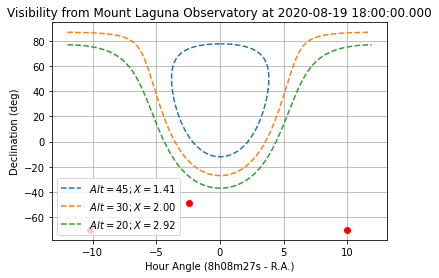

In [8]:
# set the location
lon = -116.426938 * u.deg
lat = 32.842167 * u.deg
height = 1860 * u.m
location = EarthLocation(lat=lat, lon=lon, height=height)
# load the target list
dtype = []
dtype.append( ('name', 'U18') )
dtype.append( ('ra', 'U18') )
dtype.append( ('dec', 'U18') )
dtype.append( ('epoch', 'U18') )
target_list = np.genfromtxt('target.lst', dtype=dtype)
# store the positions in a SkyCoord
targets = SkyCoord(target_list['ra'], target_list['dec'], unit='hour, deg')

time = Time('2020-08-19 18:00:00')
make_visibility_plot(time, location, targets)

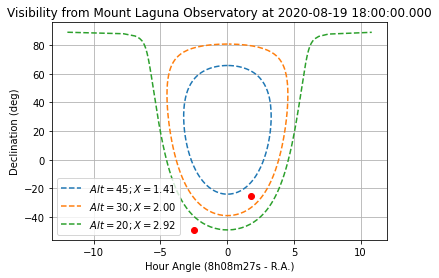

In [16]:
# set the location
lat =  20.8111* u.deg
long = -32.3758 * u.deg
height = 1798 * u.m
location = EarthLocation(lat=lat, lon=lon, height=height)
# load the target list
dtype = []
dtype.append( ('name', 'U18') )
dtype.append( ('ra', 'U18') )
dtype.append( ('dec', 'U18') )
dtype.append( ('epoch', 'U18') )
target_list = np.genfromtxt('target.lst', dtype=dtype)
# store the positions in a SkyCoord
targets = SkyCoord(target_list['ra'], target_list['dec'], unit='hour, deg')

time = Time('2020-08-19 18:00:00')
make_visibility_plot(time, location, targets)